In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

<font color=black> **Exploratory data analysis** </font>

In [38]:
# Reading the data for Exploratory data analysis
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<font color ='blue'>We want to check the datapoints(i.e how many entries are there). Using shape function we got to know that there are 25 entries, 2 features.</font>

In [8]:
df.shape

(25, 2)

<font color=blue> We want to see that are there any null values present in our dataset; By using isnull().sum() attribute od dataframe provided by Pandas we concluded that there are no null values present in Hours and Scores features. </font>

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<font color='blue'>Using describe function we get an overall look of the dataset.<br>
Count depicts that there are 25 values. Mean of Hours is 5.01 and of Scores is 51.48<br>
mean ± std gives us the spread covered. i.e in 1st std from mean 68% of data is present.In 2nd and 3rd std from mean 95% and 99.7% data are present respectively. </font>

In [17]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


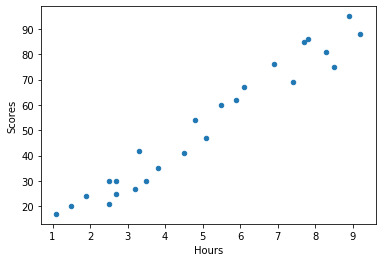

In [34]:
#Plotting the distribution of scores
df.plot.scatter(x='Hours',y='Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

<font color='blue'> From the above plot, it is clear that our two features Hours and Scores share a positive linear relation. The co-relation between them is found to be 97.61%</font>

In [37]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).


In [40]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

Now we have our input variable and output variable seperated. The next step is to split this data into training and testing sets. we will do it by using scikit's built in train_test_split method.

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

### **Training the algorithm**



In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
print("Training complete")

Training complete


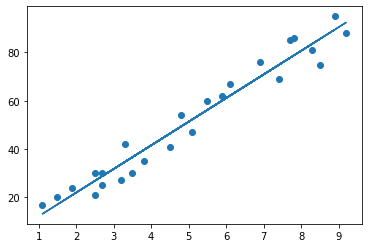

In [49]:
#visulizing the best fit regression line

line = regressor.coef_*X + regressor.intercept_
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

### **Making Predictions**

In [50]:
print(X_test)
Y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [51]:
# comparing actual vs predicted

df_pred = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred}) 
df_pred

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [61]:
 #query inferencing
hours = 9.25
query_pred = regressor.predict([[hours]])
print("no of hours = {}".format(hours))
print("predicted score = {}".format(query_pred[0]))


no of hours = 9.25
predicted score = 92.91505723477056


### Evaluating the model

The final step is to evaluate the performance of algorithm. We have diffrent performance evaluation metrics such as Mean Absolute Error, R sqared , Adjusted R-squared etc. For simplicity we have chosen the mean sqaure error.

In [62]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Y_pred))

Mean Absolute Error: 4.419727808027652


which tells us that our model is 95.58% accurate.